In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [132]:
# import and view data
file_crypto = f"Data/crypto_data.csv"
crypto = pd.read_csv(file_crypto)
crypto = pd.DataFrame(crypto)
crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [92]:
# filter out crypto that are not trading
fil_true = ~crypto.IsTrading.isin([False])
crypto_trade = crypto[fil_true]
crypto_trade = crypto_trade.drop('IsTrading',axis=1)
crypto_trade.count()

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64

In [93]:
# drop crypto that have missing info
crypto_trade = crypto_trade.dropna()
crypto_trade.count()

Unnamed: 0         685
CoinName           685
Algorithm          685
ProofType          685
TotalCoinsMined    685
TotalCoinSupply    685
dtype: int64

In [94]:
# filter for crypto that have mined coins
fil_unmined = crypto_trade['TotalCoinsMined'] > 0
crypto_trade = crypto_trade[fil_unmined]
crypto_trade

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [95]:
# drop coin names and other unnecessary columns
coin_labels = crypto_trade['CoinName']
crypto_trade = crypto_trade.drop(['Unnamed: 0','CoinName'],axis=1)
crypto_trade.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [96]:
# convert total coin supply to a float
crypto_trade['TotalCoinSupply'] = crypto_trade['TotalCoinSupply'].astype(str).astype('float64')

In [113]:
# convert categorical to numeric data
dum_crypto = pd.get_dummies(crypto_trade)
dum_crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# scale crypto data
scaler = StandardScaler().fit(dum_crypto)
crypto_scaled = scaler.transform(dum_crypto)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [ ]:
# use pca to reduce data dimensions
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_scaled)

In [108]:
# create a data frame from pca output
crypto_pca_df = pd.DataFrame(crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.035564e-14,5.461576e-12,-1.527004e-14,-0.007129,-1.319756,-0.051813,...,2.747130e-15,-1.339381e-15,1.408231e-15,2.877342e-15,1.672276e-15,1.708720e-15,7.341685e-16,-2.843832e-15,-3.177101e-16,-4.191777e-15
1,-0.318434,1.032331,-0.591126,0.001386,-1.040778e-14,5.416687e-12,-1.531340e-14,-0.007739,-1.322514,-0.056674,...,2.577671e-15,-1.964144e-15,1.308043e-15,2.844729e-15,9.964367e-16,1.358424e-15,1.127271e-15,-2.284229e-15,-2.198748e-16,-4.328156e-15
2,2.305468,1.656383,-0.683617,0.004731,-7.376557e-15,1.859418e-11,-1.840722e-14,-0.054781,-1.542879,-0.943951,...,-1.204101e-13,9.991298e-14,-4.973886e-14,-2.065027e-16,-1.227454e-14,4.550166e-14,-2.058968e-14,2.685178e-14,-3.057673e-15,1.671137e-15
3,-0.145184,-1.320593,0.192813,-0.001229,2.794252e-15,-4.827241e-12,4.460274e-15,-0.002071,0.281463,0.251862,...,-1.300366e-14,1.870041e-14,1.108051e-14,-7.018385e-15,-1.490815e-14,-1.002944e-14,1.053462e-14,-2.457524e-15,-1.009348e-15,7.029822e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.160068e-14,-6.689528e-12,7.748872e-15,0.027735,0.519099,0.188820,...,9.364980e-14,7.554489e-14,2.695913e-14,-1.368629e-13,-1.315310e-14,-2.423112e-13,5.267277e-14,-7.792262e-14,3.176961e-14,8.501175e-14


In [111]:
# use TSNE to further reduce dimensions
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca_df)
tsne_features.shape

(532, 2)

In [114]:
# add tsne features to dataframe
crypto_pca_df['x'] = tsne_features[:,0]
crypto_pca_df['y'] = tsne_features[:,1]

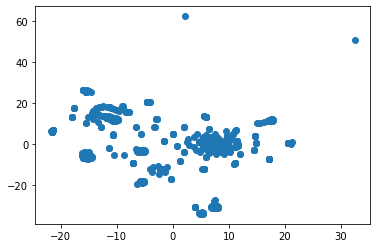

In [116]:
# visualize tsne output
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

C:\Users\Doc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


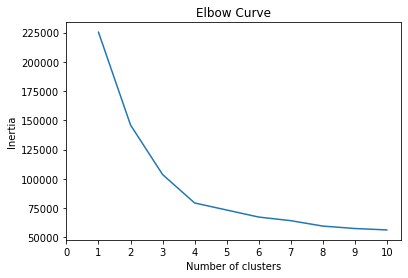

In [120]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)
    
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [128]:
# Predicting clusters with k=4
model = KMeans(n_clusters=4, random_state=0)
# Fit the model
model.fit(crypto_pca_df)
# Predict clusters
predictions = model.predict(crypto_pca_df)
# Add the predicted class column to the dataframe
crypto_pca_df["class"] = model.labels_
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,x,y,class
0,-0.335099,1.032189,-0.590713,0.001397,-1.035564e-14,5.461576e-12,-1.527004e-14,-0.007129,-1.319756,-0.051813,...,2.877342e-15,1.672276e-15,1.708720e-15,7.341685e-16,-2.843832e-15,-3.177101e-16,-4.191777e-15,-9.826333,11.693202,1
1,-0.318434,1.032331,-0.591126,0.001386,-1.040778e-14,5.416687e-12,-1.531340e-14,-0.007739,-1.322514,-0.056674,...,2.844729e-15,9.964367e-16,1.358424e-15,1.127271e-15,-2.284229e-15,-2.198748e-16,-4.328156e-15,-11.362099,18.163834,1
2,2.305468,1.656383,-0.683617,0.004731,-7.376557e-15,1.859418e-11,-1.840722e-14,-0.054781,-1.542879,-0.943951,...,-2.065027e-16,-1.227454e-14,4.550166e-14,-2.058968e-14,2.685178e-14,-3.057673e-15,1.671137e-15,-14.603194,25.483845,1
3,-0.145184,-1.320593,0.192813,-0.001229,2.794252e-15,-4.827241e-12,4.460274e-15,-0.002071,0.281463,0.251862,...,-7.018385e-15,-1.490815e-14,-1.002944e-14,1.053462e-14,-2.457524e-15,-1.009348e-15,7.029822e-15,7.070423,-30.973085,2
4,-0.151768,-2.036192,0.396182,-0.001705,1.160068e-14,-6.689528e-12,7.748872e-15,0.027735,0.519099,0.188820,...,-1.368629e-13,-1.315310e-14,-2.423112e-13,5.267277e-14,-7.792262e-14,3.176961e-14,8.501175e-14,17.187134,-6.908352,0


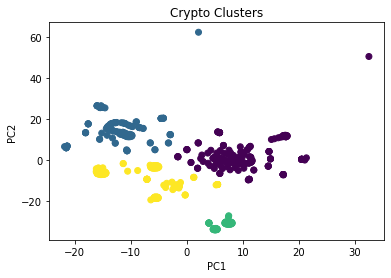

In [131]:
# visualize crypto classes
labels = crypto_pca_df['class']
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'], c=labels)
plt.title('Crypto Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()